In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import string


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Download NLTK data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('IMDB Dataset.csv')  # Ensure file is in working directory

In [ ]:
print("Sample data:\n", df.head())
print("Dataset shape:", df.shape)


Sample data:
                                               review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Dataset shape: (50000, 2)


In [ ]:
# 2. Label Encoding
# --------------------------------
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [ ]:
# 3. Preprocessing
# --------------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
def preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t not in string.punctuation]
    tokens = [t for t in tokens if t not in stop_words]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return " ".join(tokens)

In [ ]:
print("\nPreprocessing...")
df['clean_review'] = df['review'].apply(preprocess)


Preprocessing...


In [ ]:
# 4. Split Data
# --------------------------------
X = df['clean_review']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 5. TF-IDF Vectorization
# --------------------------------
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# 6. Model Training
# --------------------------------
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

In [ ]:
# 7. Evaluation
# --------------------------------
y_pred = model.predict(X_test_vec)

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.8877

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



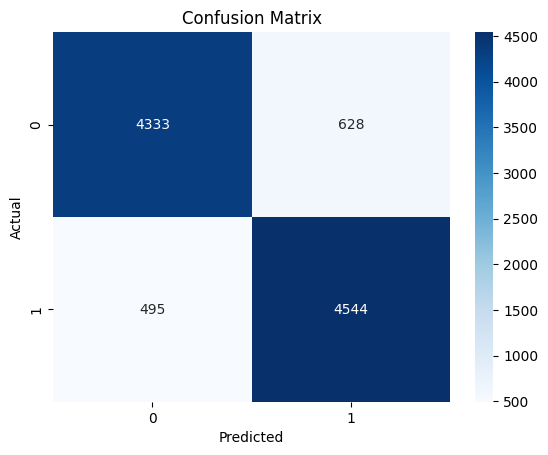

In [ ]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# 8. Predict New Review
# --------------------------------
def predict_sentiment(text):
    clean = preprocess(text)
    vec = vectorizer.transform([clean])
    result = model.predict(vec)[0]
    return "Positive" if result == 1 else "Negative"

In [ ]:
# Example
print("\nSample Prediction:")
sample_review = "This movie was absolutely wonderful, I loved it!"
print(f"Review: {sample_review}")
print("Predicted Sentiment:", predict_sentiment(sample_review))


Sample Prediction:
Review: This movie was absolutely wonderful, I loved it!
Predicted Sentiment: Positive
